## 3.Project/homework

Multiclass and one-vs-all.

In chapter 1 we've created a multiclass classifier for MNIST dataset. Please create a classifier with a strategy known as one-vs-all.
It means you should create 10 separate classifiers, each for a single class.

Build and train the smallest possible (by the number of trainable weights) classifiers with an F1 (macro) score at 0.97 level.

Compare the number of total weights for 10 classifiers one-vs-all and 1 multi-classifier.

**This homework is obligatory. Please send colab link to kwant@agh.edu.pl before 08.05.2024.**

In [1]:
!wget -nc https://raw.githubusercontent.com/MenosGrandes/AI_ML_Course/main/requirements.txt


File ‘requirements.txt’ already there; not retrieving.



In [2]:
!pip install -r requirements.txt
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
import pandas as pd
import numpy as np
import platform
import pandas as pd
import numpy as np
import warnings
import sys;
#define Seaborn color palette to use
import numpy as np
from math import ceil
from itertools import zip_longest
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
import missingno as msno
import re
import tensorflow as tf
import keras
from keras import layers
from keras import ops




2024-04-23 13:10:41.052964: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-23 13:10:41.053425: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-23 13:10:41.056078: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-23 13:10:41.086172: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-23 13:10:41.690354: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [3]:
import logging
from rich.logging import RichHandler

FORMAT = "%(message)s"
logging.basicConfig(
    level="NOTSET", format=FORMAT, datefmt="[%X]", handlers=[RichHandler()]
)

logger = logging.getLogger("rich")


In [4]:
v = platform.python_version_tuple();
if float(v[1]) < 10:
    raise Exception("MUST USE Python 3.10 to use MATCH expression!")

warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
np.set_printoptions(threshold=sys.maxsize)
pd.options.display.max_colwidth = 1000

In [5]:
import tensorflow as tf

# import MNIST dataset
(x_train, y_train), (x_valid, y_valid) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255       # 784 = 28*28
x_valid = x_valid.reshape(10000, 784).astype('float32') / 255

display('x_train size: ' + str(x_train.shape))

'x_train size: (60000, 784)'

In [6]:
#@title Display MNIST data

import matplotlib.pyplot as plt
import random

def plot_mnist(images, labels):
    fig, ax = plt.subplots(4, 4, figsize=(8, 8), sharex='col', sharey='row')
    for x in range(4):
        for y in range(4):
            idx = random.randint(0, images.shape[0]-1)
            img = images[idx].reshape(28, 28)
            truth = labels[idx]
            ax[x,y].imshow(img, cmap='gray')
            ax[x,y].set_title(str(truth))



[13:10:42] DEBUG    Loaded backend module://matplotlib_inline.backend_inline version unknown.         ]8;id=117880;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/pyplot.py\pyplot.py]8;;\:]8;id=919592;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/pyplot.py#414\414]8;;\

           DEBUG    Loaded backend module://matplotlib_inline.backend_inline version unknown.         ]8;id=808797;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/pyplot.py\pyplot.py]8;;\:]8;id=880755;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/pyplot.py#414\414]8;;\

           DEBUG    findfont: Matching                                                         ]8;id=617181;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=784939;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1411\1411]8;;\
                    sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=                     
                    10.0.                                                                                          

           DEBUG    findfont:                                                                  ]8;id=236752;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=102723;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizFiveSymReg.ttf',                                            
                    name='STIXSizeFiveSym', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=402017;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=122829;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/cmr10.ttf', name='cmr10', style='normal',                          
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=356664;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=83905;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSans-BoldOblique.ttf', name='DejaVu                          
                    Sans', style='oblique', variant='normal', weight=700, stretch='normal',                        
                    size='scalable')) = 1.335                                                                      

           DEBUG    findfont:                                                                  ]8;id=108526;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=597087;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/cmss10.ttf', name='cmss10', style='normal',                        
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=583916;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=311682;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.ttf', name='DejaVu Sans',                       
                    style='oblique', variant='normal', weight=400, stretch='normal',                               
                    size='scalable')) = 1.05                                                                       

           DEBUG    findfont:                                                                  ]8;id=887101;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=291511;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSerif-BoldItalic.ttf', name='DejaVu                          
                    Serif', style='italic', variant='normal', weight=700, stretch='normal',                        
                    size='scalable')) = 11.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=332120;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=494449;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Bold.ttf', name='DejaVu Sans                        
                    Mono', style='normal', variant='normal', weight=700, stretch='normal',                         
                    size='scalable')) = 10.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=287309;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=859656;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizOneSymReg.ttf', name='STIXSizeOneSym',                      
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=334873;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=788697;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXGeneralItalic.ttf', name='STIXGeneral',                        
                    style='italic', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 11.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=443398;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=413028;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSerif-Bold.ttf', name='DejaVu Serif',                        
                    style='normal', variant='normal', weight=700, stretch='normal',                                
                    size='scalable')) = 10.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=138650;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=222089;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf', name='DejaVu Sans',                          
                    style='normal', variant='normal', weight=700, stretch='normal',                                
                    size='scalable')) = 0.33499999999999996                                                        

           DEBUG    findfont:                                                                  ]8;id=985731;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=115240;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSerif-Italic.ttf', name='DejaVu Serif',                      
                    style='italic', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 11.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=559015;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=586005;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizFourSymBol.ttf',                                            
                    name='STIXSizeFourSym', style='normal', variant='normal', weight=700,                          
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=135603;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=895758;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXNonUniBol.ttf', name='STIXNonUnicode',                         
                    style='normal', variant='normal', weight=700, stretch='normal',                                
                    size='scalable')) = 10.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=811514;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=226861;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizThreeSymReg.ttf',                                           
                    name='STIXSizeThreeSym', style='normal', variant='normal', weight=400,                         
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=882372;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=320334;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSansDisplay.ttf', name='DejaVu Sans                          
                    Display', style='normal', variant='normal', weight=400, stretch='normal',                      
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=129340;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=384124;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/cmtt10.ttf', name='cmtt10', style='normal',                        
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=649661;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=424413;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/cmmi10.ttf', name='cmmi10', style='normal',                        
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=114777;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=152837;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXGeneralBol.ttf', name='STIXGeneral',                           
                    style='normal', variant='normal', weight=700, stretch='normal',                                
                    size='scalable')) = 10.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=755563;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=90791;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/cmex10.ttf', name='cmex10', style='normal',                        
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=982454;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=388547;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSansMono.ttf', name='DejaVu Sans Mono',                      
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=212528;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=294990;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizOneSymBol.ttf', name='STIXSizeOneSym',                      
                    style='normal', variant='normal', weight=700, stretch='normal',                                
                    size='scalable')) = 10.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=889255;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=291720;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXGeneralBolIta.ttf', name='STIXGeneral',                        
                    style='italic', variant='normal', weight=700, stretch='normal',                                
                    size='scalable')) = 11.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=68185;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=306334;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/cmsy10.ttf', name='cmsy10', style='normal',                        
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=262024;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=218504;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXNonUniIta.ttf', name='STIXNonUnicode',                         
                    style='italic', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 11.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=163660;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=114634;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf', name='STIXGeneral',                              
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=827319;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=611565;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizThreeSymBol.ttf',                                           
                    name='STIXSizeThreeSym', style='normal', variant='normal', weight=700,                         
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=72543;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=115051;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSerif.ttf', name='DejaVu Serif',                             
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=612818;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=769735;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Oblique.ttf', name='DejaVu Sans                     
                    Mono', style='oblique', variant='normal', weight=400, stretch='normal',                        
                    size='scalable')) = 11.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=505139;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=569586;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizTwoSymReg.ttf', name='STIXSizeTwoSym',                      
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=614844;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=616727;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizFourSymReg.ttf',                                            
                    name='STIXSizeFourSym', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=492527;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=781218;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf', name='DejaVu Sans',                               
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 0.05                                                                       

           DEBUG    findfont:                                                                  ]8;id=726528;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=588596;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXNonUni.ttf', name='STIXNonUnicode',                            
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=418857;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=132868;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSansMono-BoldOblique.ttf', name='DejaVu                      
                    Sans Mono', style='oblique', variant='normal', weight=700,                                     
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=482764;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=449187;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSerifDisplay.ttf', name='DejaVu Serif                        
                    Display', style='normal', variant='normal', weight=400, stretch='normal',                      
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=102062;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=108456;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/cmb10.ttf', name='cmb10', style='normal',                          
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=382027;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=827198;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizTwoSymBol.ttf', name='STIXSizeTwoSym',                      
                    style='normal', variant='normal', weight=700, stretch='normal',                                
                    size='scalable')) = 10.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=84481;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=505974;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXNonUniBolIta.ttf', name='STIXNonUnicode',                      
                    style='italic', variant='normal', weight=700, stretch='normal',                                
                    size='scalable')) = 11.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=681615;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=75470;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-Semibold.ttf                     
                    ', name='Source Code Pro', style='normal', variant='normal', weight=600,                       
                    stretch='normal', size='scalable')) = 10.24                                                    

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-L.ttf',   ]8;id=160920;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=451403;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu', style='normal', variant='normal', weight=300,                                   
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-M.ttf',   ]8;id=989792;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=268811;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu', style='normal', variant='normal', weight=500,                                   
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=613937;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=229767;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-C.ttf',                         
                    name='Ubuntu Condensed', style='normal', variant='normal', weight=400,                         
                    stretch='condensed', size='scalable')) = 10.25                                                 

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-R.ttf',   ]8;id=214648;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=658286;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=447930;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=203678;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-RI.ttf',                        
                    name='Ubuntu', style='italic', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=761120;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=810413;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-Regular.ttf'                     
                    , name='Source Code Pro', style='normal', variant='normal', weight=400,                        
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/DejaVuSans.ttf', ]8;id=112874;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=44883;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='DejaVu Sans', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 0.05                                                     

           DEBUG    findfont:                                                                  ]8;id=874806;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=994136;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSerif.ttf',                      
                    name='DejaVu Serif', style='normal', variant='normal', weight=400,                             
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=426826;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=153534;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-B.ttf',                         
                    name='Ubuntu', style='normal', variant='normal', weight=700,                                   
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=269949;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=147738;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-BI.ttf',                        
                    name='Ubuntu', style='italic', variant='normal', weight=700,                                   
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-LI.ttf',  ]8;id=819476;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=192903;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu', style='italic', variant='normal', weight=300,                                   
                    stretch='normal', size='scalable')) = 11.145                                                   

           DEBUG    findfont:                                                                  ]8;id=578356;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=771066;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/UbuntuMono-RI.ttf'                     
                    , name='Ubuntu Mono', style='italic', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-MI.ttf',  ]8;id=736878;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=995475;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu', style='italic', variant='normal', weight=500,                                   
                    stretch='normal', size='scalable')) = 11.145                                                   

           DEBUG    findfont:                                                                  ]8;id=220410;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=483642;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/UbuntuMono-BI.ttf',                            
                    name='Ubuntu Mono', style='italic', variant='normal', weight=700,                              
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=402072;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=418929;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-MediumIt.ttf                     
                    ', name='Source Code Pro', style='italic', variant='normal', weight=500,                       
                    stretch='normal', size='scalable')) = 11.145                                                   

           DEBUG    findfont:                                                                  ]8;id=388895;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=804114;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-ExtraLightIt                     
                    .ttf', name='Source Code Pro', style='italic', variant='normal',                               
                    weight=200, stretch='normal', size='scalable')) = 11.24                                        

           DEBUG    findfont:                                                                  ]8;id=144755;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=869470;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSansMono.ttf                     
                    ', name='DejaVu Sans Mono', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=952304;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=537471;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/Inconsolata-Bold.ttf',                         
                    name='Inconsolata', style='normal', variant='normal', weight=700,                              
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=776430;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=701795;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-ExtraLight.t                     
                    tf', name='Source Code Pro', style='normal', variant='normal', weight=200,                     
                    stretch='normal', size='scalable')) = 10.24                                                    

           DEBUG    findfont:                                                                  ]8;id=480637;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=250154;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/UbuntuMono-R.ttf',                             
                    name='Ubuntu Mono', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-BI.ttf',  ]8;id=265546;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=466286;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu', style='italic', variant='normal', weight=700,                                   
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=410440;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=348951;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-Th.ttf',                        
                    name='Ubuntu', style='normal', variant='normal', weight=250,                                   
                    stretch='normal', size='scalable')) = 10.1925                                                  

           DEBUG    findfont:                                                                  ]8;id=716652;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=328521;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-Light.ttf',                      
                    name='Source Code Pro', style='normal', variant='normal', weight=300,                          
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-B.ttf',   ]8;id=328515;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=101154;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu', style='normal', variant='normal', weight=700,                                   
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=889889;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=829603;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/UbuntuMono-RI.ttf',                            
                    name='Ubuntu Mono', style='italic', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-RI.ttf',  ]8;id=682253;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=776466;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu', style='italic', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-C.ttf',   ]8;id=28424;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=326972;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu Condensed', style='normal', variant='normal', weight=400,                         
                    stretch='condensed', size='scalable')) = 10.25                                                 

           DEBUG    findfont:                                                                  ]8;id=940699;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=417416;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-M.ttf',                         
                    name='Ubuntu', style='normal', variant='normal', weight=500,                                   
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=932029;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=161063;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.tt                     
                    f', name='DejaVu Sans', style='normal', variant='normal', weight=700,                          
                    stretch='normal', size='scalable')) = 0.33499999999999996                                      

           DEBUG    findfont:                                                                  ]8;id=422514;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=655281;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-L.ttf',                         
                    name='Ubuntu', style='normal', variant='normal', weight=300,                                   
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=436696;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=714032;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/UbuntuMono-B.ttf',                             
                    name='Ubuntu Mono', style='normal', variant='normal', weight=700,                              
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=299259;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=832320;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-Medium.ttf',                     
                    name='Source Code Pro', style='normal', variant='normal', weight=500,                          
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=218899;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=386385;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-BoldIt.ttf',                     
                    name='Source Code Pro', style='italic', variant='normal', weight=700,                          
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=411028;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=590991;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-LI.ttf',                        
                    name='Ubuntu', style='italic', variant='normal', weight=300,                                   
                    stretch='normal', size='scalable')) = 11.145                                                   

           DEBUG    findfont:                                                                  ]8;id=502447;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=48183;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-Bold.ttf',                       
                    name='Source Code Pro', style='normal', variant='normal', weight=700,                          
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=52799;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=568995;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSerif-Bold.t                     
                    tf', name='DejaVu Serif', style='normal', variant='normal', weight=700,                        
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=481904;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=709721;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-BlackIt.ttf'                     
                    , name='Source Code Pro', style='italic', variant='normal', weight=900,                        
                    stretch='normal', size='scalable')) = 11.525                                                   

           DEBUG    findfont:                                                                  ]8;id=52520;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=62;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/UbuntuMono-BI.ttf'                     
                    , name='Ubuntu Mono', style='italic', variant='normal', weight=700,                            
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=481909;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=681508;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/UbuntuMono-R.ttf',                     
                    name='Ubuntu Mono', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=143790;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=456087;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-MI.ttf',                        
                    name='Ubuntu', style='italic', variant='normal', weight=500,                                   
                    stretch='normal', size='scalable')) = 11.145                                                   

           DEBUG    findfont:                                                                  ]8;id=303681;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=101847;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/Inconsolata-Regular.ttf',                      
                    name='Inconsolata', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=208616;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=503486;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSansMono-Bol                     
                    d.ttf', name='DejaVu Sans Mono', style='normal', variant='normal',                             
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont:                                                                  ]8;id=717637;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=606880;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-R.ttf',                         
                    name='Ubuntu', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=818980;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=961886;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/UbuntuMono-B.ttf',                     
                    name='Ubuntu Mono', style='normal', variant='normal', weight=700,                              
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=635806;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=625829;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-SemiboldIt.t                     
                    tf', name='Source Code Pro', style='italic', variant='normal', weight=600,                     
                    stretch='normal', size='scalable')) = 11.24                                                    

           DEBUG    findfont:                                                                  ]8;id=249719;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=445669;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf',                       
                    name='DejaVu Sans', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 0.05                                                     

           DEBUG    findfont:                                                                  ]8;id=53967;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=177154;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-It.ttf',                         
                    name='Source Code Pro', style='italic', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=688481;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=464023;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-LightIt.ttf'                     
                    , name='Source Code Pro', style='italic', variant='normal', weight=300,                        
                    stretch='normal', size='scalable')) = 11.145                                                   

           DEBUG    findfont:                                                                  ]8;id=190011;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=53663;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-Black.ttf',                      
                    name='Source Code Pro', style='normal', variant='normal', weight=900,                          
                    stretch='normal', size='scalable')) = 10.525                                                   

           DEBUG    findfont: Matching                                                         ]8;id=512152;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=795299;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1454\1454]8;;\
                    sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=                     
                    10.0 to DejaVu Sans                                                                            
                    ('/home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/mpl-data/fon                     
                    ts/ttf/DejaVuSans.ttf') with score of 0.050000.                                                

           DEBUG    findfont: Matching                                                         ]8;id=517316;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=639502;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1411\1411]8;;\
                    sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=                     
                    12.0.                                                                                          

           DEBUG    findfont:                                                                  ]8;id=312635;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=358458;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizFiveSymReg.ttf',                                            
                    name='STIXSizeFiveSym', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=386358;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=660620;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/cmr10.ttf', name='cmr10', style='normal',                          
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=483174;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=229033;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSans-BoldOblique.ttf', name='DejaVu                          
                    Sans', style='oblique', variant='normal', weight=700, stretch='normal',                        
                    size='scalable')) = 1.335                                                                      

           DEBUG    findfont:                                                                  ]8;id=32869;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=683941;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/cmss10.ttf', name='cmss10', style='normal',                        
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=631228;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=841006;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.ttf', name='DejaVu Sans',                       
                    style='oblique', variant='normal', weight=400, stretch='normal',                               
                    size='scalable')) = 1.05                                                                       

           DEBUG    findfont:                                                                  ]8;id=653040;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=979848;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSerif-BoldItalic.ttf', name='DejaVu                          
                    Serif', style='italic', variant='normal', weight=700, stretch='normal',                        
                    size='scalable')) = 11.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=1993;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=83978;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Bold.ttf', name='DejaVu Sans                        
                    Mono', style='normal', variant='normal', weight=700, stretch='normal',                         
                    size='scalable')) = 10.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=875294;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=930296;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizOneSymReg.ttf', name='STIXSizeOneSym',                      
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=310711;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=316809;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXGeneralItalic.ttf', name='STIXGeneral',                        
                    style='italic', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 11.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=590259;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=930675;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSerif-Bold.ttf', name='DejaVu Serif',                        
                    style='normal', variant='normal', weight=700, stretch='normal',                                
                    size='scalable')) = 10.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=461943;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=832836;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf', name='DejaVu Sans',                          
                    style='normal', variant='normal', weight=700, stretch='normal',                                
                    size='scalable')) = 0.33499999999999996                                                        

           DEBUG    findfont:                                                                  ]8;id=721728;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=841028;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSerif-Italic.ttf', name='DejaVu Serif',                      
                    style='italic', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 11.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=567708;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=254791;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizFourSymBol.ttf',                                            
                    name='STIXSizeFourSym', style='normal', variant='normal', weight=700,                          
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=374655;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=773743;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXNonUniBol.ttf', name='STIXNonUnicode',                         
                    style='normal', variant='normal', weight=700, stretch='normal',                                
                    size='scalable')) = 10.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=405513;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=694703;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizThreeSymReg.ttf',                                           
                    name='STIXSizeThreeSym', style='normal', variant='normal', weight=400,                         
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=555631;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=502597;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSansDisplay.ttf', name='DejaVu Sans                          
                    Display', style='normal', variant='normal', weight=400, stretch='normal',                      
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=812757;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=246781;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/cmtt10.ttf', name='cmtt10', style='normal',                        
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=151856;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=608539;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/cmmi10.ttf', name='cmmi10', style='normal',                        
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=851915;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=437135;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXGeneralBol.ttf', name='STIXGeneral',                           
                    style='normal', variant='normal', weight=700, stretch='normal',                                
                    size='scalable')) = 10.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=612489;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=151408;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/cmex10.ttf', name='cmex10', style='normal',                        
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=209425;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=375178;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSansMono.ttf', name='DejaVu Sans Mono',                      
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=328718;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=317541;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizOneSymBol.ttf', name='STIXSizeOneSym',                      
                    style='normal', variant='normal', weight=700, stretch='normal',                                
                    size='scalable')) = 10.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=477852;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=361843;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXGeneralBolIta.ttf', name='STIXGeneral',                        
                    style='italic', variant='normal', weight=700, stretch='normal',                                
                    size='scalable')) = 11.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=37491;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=156793;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/cmsy10.ttf', name='cmsy10', style='normal',                        
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=719649;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=773443;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXNonUniIta.ttf', name='STIXNonUnicode',                         
                    style='italic', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 11.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=549488;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=264900;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf', name='STIXGeneral',                              
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=384955;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=171735;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizThreeSymBol.ttf',                                           
                    name='STIXSizeThreeSym', style='normal', variant='normal', weight=700,                         
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=443222;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=345164;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSerif.ttf', name='DejaVu Serif',                             
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=398639;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=132278;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Oblique.ttf', name='DejaVu Sans                     
                    Mono', style='oblique', variant='normal', weight=400, stretch='normal',                        
                    size='scalable')) = 11.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=515371;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=340744;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizTwoSymReg.ttf', name='STIXSizeTwoSym',                      
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=768139;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=970755;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizFourSymReg.ttf',                                            
                    name='STIXSizeFourSym', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=715679;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=660063;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf', name='DejaVu Sans',                               
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 0.05                                                                       

           DEBUG    findfont:                                                                  ]8;id=449276;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=796699;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXNonUni.ttf', name='STIXNonUnicode',                            
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=906632;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=191883;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSansMono-BoldOblique.ttf', name='DejaVu                      
                    Sans Mono', style='oblique', variant='normal', weight=700,                                     
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=636089;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=33762;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSerifDisplay.ttf', name='DejaVu Serif                        
                    Display', style='normal', variant='normal', weight=400, stretch='normal',                      
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=930290;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=104914;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/cmb10.ttf', name='cmb10', style='normal',                          
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=503198;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=472584;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizTwoSymBol.ttf', name='STIXSizeTwoSym',                      
                    style='normal', variant='normal', weight=700, stretch='normal',                                
                    size='scalable')) = 10.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=560192;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=57335;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXNonUniBolIta.ttf', name='STIXNonUnicode',                      
                    style='italic', variant='normal', weight=700, stretch='normal',                                
                    size='scalable')) = 11.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=284004;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=552513;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-Semibold.ttf                     
                    ', name='Source Code Pro', style='normal', variant='normal', weight=600,                       
                    stretch='normal', size='scalable')) = 10.24                                                    

[13:10:43] DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-L.ttf',   ]8;id=170974;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=640230;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu', style='normal', variant='normal', weight=300,                                   
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-M.ttf',   ]8;id=344190;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=215531;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu', style='normal', variant='normal', weight=500,                                   
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=247457;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=356753;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-C.ttf',                         
                    name='Ubuntu Condensed', style='normal', variant='normal', weight=400,                         
                    stretch='condensed', size='scalable')) = 10.25                                                 

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-R.ttf',   ]8;id=187505;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=623499;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=735383;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=830784;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-RI.ttf',                        
                    name='Ubuntu', style='italic', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=796639;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=49117;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-Regular.ttf'                     
                    , name='Source Code Pro', style='normal', variant='normal', weight=400,                        
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/DejaVuSans.ttf', ]8;id=780030;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=896883;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='DejaVu Sans', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 0.05                                                     

           DEBUG    findfont:                                                                  ]8;id=998768;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=38126;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSerif.ttf',                      
                    name='DejaVu Serif', style='normal', variant='normal', weight=400,                             
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=807953;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=802663;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-B.ttf',                         
                    name='Ubuntu', style='normal', variant='normal', weight=700,                                   
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=918864;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=310477;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-BI.ttf',                        
                    name='Ubuntu', style='italic', variant='normal', weight=700,                                   
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-LI.ttf',  ]8;id=89211;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=916139;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu', style='italic', variant='normal', weight=300,                                   
                    stretch='normal', size='scalable')) = 11.145                                                   

           DEBUG    findfont:                                                                  ]8;id=404321;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=401188;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/UbuntuMono-RI.ttf'                     
                    , name='Ubuntu Mono', style='italic', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-MI.ttf',  ]8;id=183982;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=414349;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu', style='italic', variant='normal', weight=500,                                   
                    stretch='normal', size='scalable')) = 11.145                                                   

           DEBUG    findfont:                                                                  ]8;id=157419;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=240879;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/UbuntuMono-BI.ttf',                            
                    name='Ubuntu Mono', style='italic', variant='normal', weight=700,                              
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=819689;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=491945;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-MediumIt.ttf                     
                    ', name='Source Code Pro', style='italic', variant='normal', weight=500,                       
                    stretch='normal', size='scalable')) = 11.145                                                   

           DEBUG    findfont:                                                                  ]8;id=819781;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=680100;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-ExtraLightIt                     
                    .ttf', name='Source Code Pro', style='italic', variant='normal',                               
                    weight=200, stretch='normal', size='scalable')) = 11.24                                        

           DEBUG    findfont:                                                                  ]8;id=735829;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=780846;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSansMono.ttf                     
                    ', name='DejaVu Sans Mono', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=890894;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=760660;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/Inconsolata-Bold.ttf',                         
                    name='Inconsolata', style='normal', variant='normal', weight=700,                              
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=760927;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=597952;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-ExtraLight.t                     
                    tf', name='Source Code Pro', style='normal', variant='normal', weight=200,                     
                    stretch='normal', size='scalable')) = 10.24                                                    

           DEBUG    findfont:                                                                  ]8;id=694272;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=450433;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/UbuntuMono-R.ttf',                             
                    name='Ubuntu Mono', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-BI.ttf',  ]8;id=346213;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=14865;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu', style='italic', variant='normal', weight=700,                                   
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=739012;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=124906;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-Th.ttf',                        
                    name='Ubuntu', style='normal', variant='normal', weight=250,                                   
                    stretch='normal', size='scalable')) = 10.1925                                                  

           DEBUG    findfont:                                                                  ]8;id=397195;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=748195;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-Light.ttf',                      
                    name='Source Code Pro', style='normal', variant='normal', weight=300,                          
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-B.ttf',   ]8;id=713788;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=838909;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu', style='normal', variant='normal', weight=700,                                   
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=552187;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=333806;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/UbuntuMono-RI.ttf',                            
                    name='Ubuntu Mono', style='italic', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-RI.ttf',  ]8;id=197722;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=452226;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu', style='italic', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-C.ttf',   ]8;id=882862;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=683350;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu Condensed', style='normal', variant='normal', weight=400,                         
                    stretch='condensed', size='scalable')) = 10.25                                                 

           DEBUG    findfont:                                                                  ]8;id=168732;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=469889;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-M.ttf',                         
                    name='Ubuntu', style='normal', variant='normal', weight=500,                                   
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=912392;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=490072;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.tt                     
                    f', name='DejaVu Sans', style='normal', variant='normal', weight=700,                          
                    stretch='normal', size='scalable')) = 0.33499999999999996                                      

           DEBUG    findfont:                                                                  ]8;id=45132;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=564448;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-L.ttf',                         
                    name='Ubuntu', style='normal', variant='normal', weight=300,                                   
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=504827;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=831465;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/UbuntuMono-B.ttf',                             
                    name='Ubuntu Mono', style='normal', variant='normal', weight=700,                              
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=217939;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=479568;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-Medium.ttf',                     
                    name='Source Code Pro', style='normal', variant='normal', weight=500,                          
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=92553;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=536208;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-BoldIt.ttf',                     
                    name='Source Code Pro', style='italic', variant='normal', weight=700,                          
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=591754;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=94187;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-LI.ttf',                        
                    name='Ubuntu', style='italic', variant='normal', weight=300,                                   
                    stretch='normal', size='scalable')) = 11.145                                                   

           DEBUG    findfont:                                                                  ]8;id=302168;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=436440;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-Bold.ttf',                       
                    name='Source Code Pro', style='normal', variant='normal', weight=700,                          
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=168687;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=625997;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSerif-Bold.t                     
                    tf', name='DejaVu Serif', style='normal', variant='normal', weight=700,                        
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=381506;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=749353;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-BlackIt.ttf'                     
                    , name='Source Code Pro', style='italic', variant='normal', weight=900,                        
                    stretch='normal', size='scalable')) = 11.525                                                   

           DEBUG    findfont:                                                                  ]8;id=936558;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=332629;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/UbuntuMono-BI.ttf'                     
                    , name='Ubuntu Mono', style='italic', variant='normal', weight=700,                            
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=19689;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=200308;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/UbuntuMono-R.ttf',                     
                    name='Ubuntu Mono', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=770019;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=588290;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-MI.ttf',                        
                    name='Ubuntu', style='italic', variant='normal', weight=500,                                   
                    stretch='normal', size='scalable')) = 11.145                                                   

           DEBUG    findfont:                                                                  ]8;id=812630;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=744546;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/Inconsolata-Regular.ttf',                      
                    name='Inconsolata', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=902327;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=494972;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSansMono-Bol                     
                    d.ttf', name='DejaVu Sans Mono', style='normal', variant='normal',                             
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont:                                                                  ]8;id=741213;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=634847;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-R.ttf',                         
                    name='Ubuntu', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=49739;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=58071;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/UbuntuMono-B.ttf',                     
                    name='Ubuntu Mono', style='normal', variant='normal', weight=700,                              
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=972542;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=752956;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-SemiboldIt.t                     
                    tf', name='Source Code Pro', style='italic', variant='normal', weight=600,                     
                    stretch='normal', size='scalable')) = 11.24                                                    

           DEBUG    findfont:                                                                  ]8;id=519989;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=108392;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf',                       
                    name='DejaVu Sans', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 0.05                                                     

           DEBUG    findfont:                                                                  ]8;id=4514;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=530750;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-It.ttf',                         
                    name='Source Code Pro', style='italic', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=119703;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=769449;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-LightIt.ttf'                     
                    , name='Source Code Pro', style='italic', variant='normal', weight=300,                        
                    stretch='normal', size='scalable')) = 11.145                                                   

           DEBUG    findfont:                                                                  ]8;id=200323;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=106037;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-Black.ttf',                      
                    name='Source Code Pro', style='normal', variant='normal', weight=900,                          
                    stretch='normal', size='scalable')) = 10.525                                                   

           DEBUG    findfont: Matching                                                         ]8;id=701904;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=503257;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1454\1454]8;;\
                    sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=                     
                    12.0 to DejaVu Sans                                                                            
                    ('/home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/mpl-data/fon                     
                    ts/ttf/DejaVuSans.ttf') with score of 0.050000.                                                

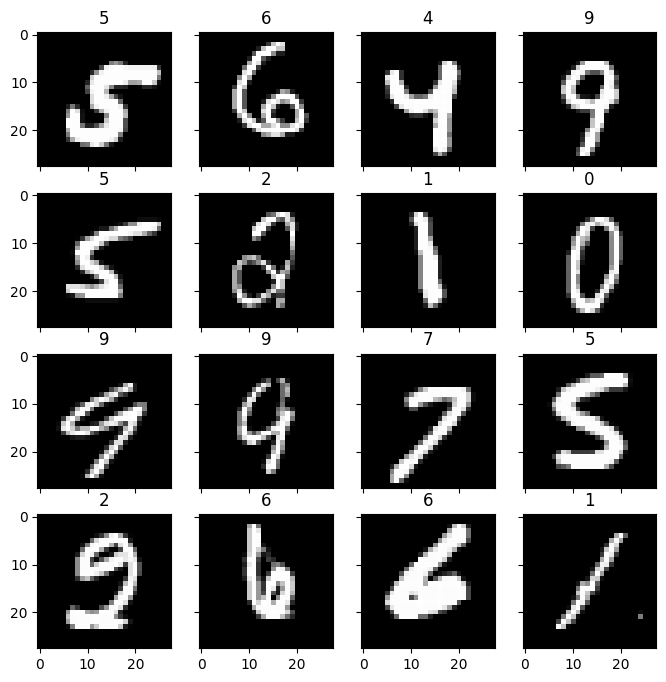

In [7]:
plot_mnist(x_train, y_train)

In [8]:
#@title load and prepare data
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# import MNIST dataset
(x_train, y_train), (x_valid, y_valid) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255       # 784 = 28*28
x_valid = x_valid.reshape(10000, 784).astype('float32') / 255

y_train_cat = to_categorical(y_train)
y_valid_cat = to_categorical(y_valid)
#@title build and train model
model = tf.keras.Sequential()
model.add(Dense(100, activation = 'relu', input_dim = 784))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(10, activation = 'sigmoid'))
# 10 epochs: loss: 0.0239 - accuracy: 0.9922 - val_loss: 0.1084 - val_accuracy: 0.9750

# model.add(Dense(10, activation = 'softmax'))
# 10 epochs: loss: 0.0221 - accuracy: 0.9927 - val_loss: 0.1021 - val_accuracy: 0.9783

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/home/mg/AI_Py_3_10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,060 (328.36 KB)

 Trainable params: 84,060 (328.36 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(x_train, y_train,
                    batch_size=16,
                    epochs=10,
                    validation_data=(x_valid, y_valid),
                    verbose=1)

Epoch 1/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8788 - loss: 0.3998 - val_accuracy: 0.9631 - val_loss: 0.1208
Epoch 2/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9661 - loss: 0.1067 - val_accuracy: 0.9697 - val_loss: 0.0908
Epoch 3/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9761 - loss: 0.0738 - val_accuracy: 0.9728 - val_loss: 0.0846
Epoch 4/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9809 - loss: 0.0590 - val_accuracy: 0.9734 - val_loss: 0.0884
Epoch 5/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9862 - loss: 0.0425 - val_accuracy: 0.9734 - val_loss: 0.0886
Epoch 6/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9881 - loss: 0.0377 - val_accuracy: 0.9783 - val_loss: 0.0753
Epoch 7/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9896 - loss: 0.0321 - val_accuracy: 0.9754 - val_loss: 0.0917
Epoch 8/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9906 - loss: 0.0272 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step


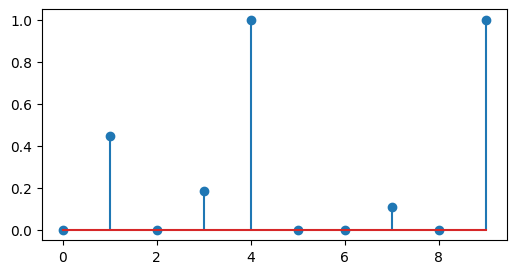

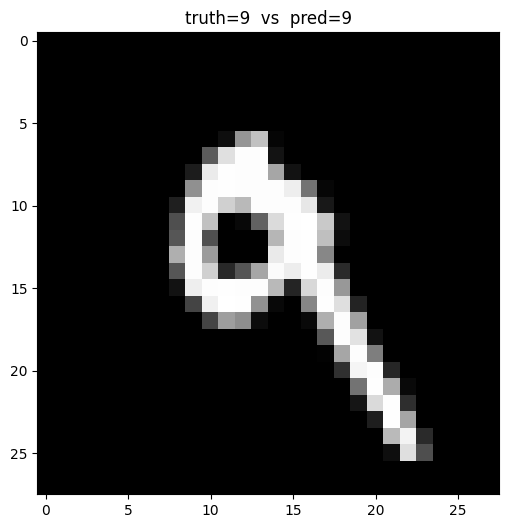

In [10]:
#@title visalize results
import numpy as np
import matplotlib.pyplot as plt

y_valid_pred = model.predict(x_valid)
# y_valid_pred[:10]

example = 7

plt.figure(figsize=(6, 3))
plt.stem(y_valid_pred[example])
plt.show()

img = x_valid[example].reshape(28, 28)
truth = np.argmax(y_valid_cat[example])
pred = np.argmax(y_valid_pred[example])

plt.figure(figsize=(6, 6))
plt.imshow(img, cmap='gray')
plt.title(f'truth={truth}  vs  pred={pred}')
plt.show()

In [11]:
# classification report
from sklearn.metrics import classification_report

# y_valid <-- ground truth, first argument in sklearn convension
y_valid_pred = np.argmax(model.predict(x_valid), axis=1)

logger.info(f'Classification report: \n {classification_report(y_valid, y_valid_pred)}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[13:11:55] INFO     Classification report:                                                          ]8;id=188605;file:///tmp/ipykernel_57877/1113570984.py\1113570984.py]8;;\:]8;id=225718;file:///tmp/ipykernel_57877/1113570984.py#7\7]8;;\
                                   precision    recall  f1-score   support                                         
                                                                                                                   
                               0       0.99      0.99      0.99       980                                          
                               1       0.99      0.99      0.99      1135                                          
                               2       0.98      0.97      0.98      1032                                          
                               3       0.97      0.98      0.98      1010                                          
                               4       0.98      0.99      0.98       982                                          
                               5       0.99      0.95      0.97       892                                          
                               6       0.97      0.99      0.98       958                                          
                               7       0.98      0.96      0.97      1028                                          
                               8       0.95      0.98      0.96       974                                          
                               9       0.96      0.97      0.97      1009                                          
                                                                                                                   
                        accuracy                           0.98     10000                                          
                       macro avg       0.98      0.98      0.98     10000                                          
                    weighted avg       0.98      0.98      0.98     10000                                          
                                                                                                                   

           INFO     Confusion matrix :                                                               ]8;id=539726;file:///tmp/ipykernel_57877/245500069.py\245500069.py]8;;\:]8;id=60184;file:///tmp/ipykernel_57877/245500069.py#6\6]8;;\
                     [[ 968    0    0    1    0    0    7    1    2    1]                                          
                     [   0 1126    3    1    0    0    2    1    2    0]                                           
                     [   3    1 1004    2    3    0    1    7   10    1]                                           
                     [   0    0    2  988    0    2    0    4    4   10]                                           
                     [   1    1    0    0  969    0    6    1    1    3]                                           
                     [   3    0    0   11    1  849   10    1   13    4]                                           
                     [   1    1    0    1    3    1  950    0    1    0]                                           
                     [   2    8    6    4    3    1    0  982    7   15]                                           
                     [   2    0    5    6    1    1    2    0  951    6]                                           
                     [   2    3    1    1   10    0    1    2    6  983]]                                          
                                                                                                                   

           DEBUG    locator: <matplotlib.ticker.AutoLocator object at 0x7f81c5e5d5d0>               ]8;id=431757;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/colorbar.py\colorbar.py]8;;\:]8;id=837537;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/colorbar.py#859\859]8;;\

/tmp/ipykernel_57877/245500069.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


           INFO     valid_9 -> 4: 10                                                                ]8;id=374946;file:///tmp/ipykernel_57877/245500069.py\245500069.py]8;;\:]8;id=329845;file:///tmp/ipykernel_57877/245500069.py#15\15]8;;\

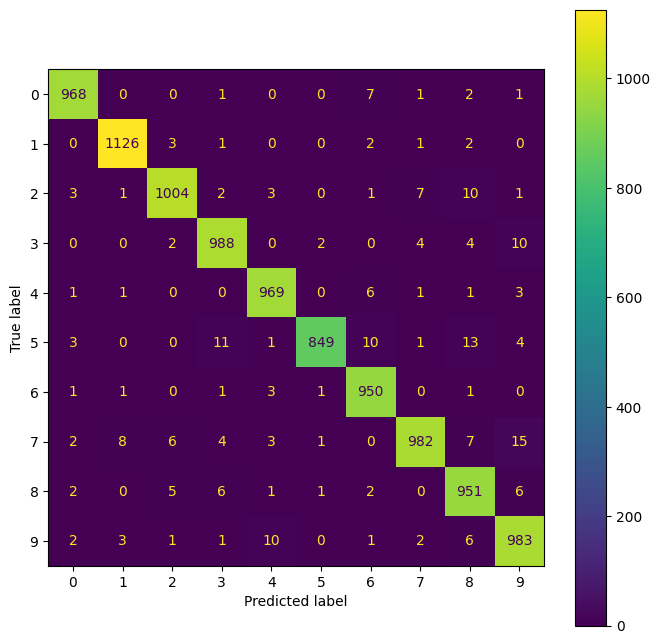

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# logger.info('i-th row: true labels\nj-th column: predicted labels')
cm = confusion_matrix(y_valid, y_valid_pred)
logger.info(f'Confusion matrix :\n {cm}\n')

cmp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(range(10)))
fig, ax = plt.subplots(figsize=(8, 8))
cmp.plot(ax=ax)
fig.show()

misclass = np.where((y_valid == 9) & (y_valid_pred == 4))
logger.info(f'valid_9 -> 4: {len(misclass[0])}')